In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [2]:
econ_df = pd.read_csv(
    "Resources/Refined Data Set.csv"
)

econ_df

,Time,GDP/capita growth (%),Access to electricity,Literacy rate (adult female),Literacy rate (youth female),Literacy rate (youth male),Literacy rate (adult male),Life expectancy at birth (female),Life expectancy at birth (\male),Primary school enrollment (net%),Labor force participation rate (female%),Labor force participation rate (male%),Net migration
0,1993,2.357339,89.318225,85.145782,93.649338,91.902779,87.969719,72.065137,65.750388,91.702070,40.455670,71.564291,-799413
1,1994,3.575111,90.223083,85.700523,94.091949,92.659912,88.555008,72.408284,66.149040,91.175760,41.652467,71.242033,-727304
2,1995,-0.841473,88.599506,86.312340,94.521599,93.420387,88.824631,72.754166,66.425347,91.075740,42.849265,70.919774,-812708
3,1996,2.367651,89.557909,86.693207,94.821121,93.742462,89.099770,73.117666,66.802275,91.551620,42.556270,69.970452,-814722
4,1997,3.620615,90.015864,86.990997,94.866676,93.907623,89.505096,73.483913,67.154166,90.591650,43.339769,69.828303,-802462
5,1998,1.059776,90.636887,87.535812,95.135422,94.211693,89.744217,73.701137,67.433797,92.100535,43.640127,69.902232,-798462
6,1999,-0.865684,91.247588,87.886726,95.358742,94.382912,89.914337,74.114224,67.825597,93.609420,44.277077,69.962526,-870278
7,2000,2.058134,91.725741,88.205704,95.574059,94.570038,90.085747,74.563693,68.032323,94.227670,44.399940,69.168548,-933168
8,2001,-0.919453,92.342229,88.230637,95.670761,94.702438,90.132202,74.842232,68.273577,94.465920,44.522803,68.374571,-949876
9,2002,-0.832495,92.646073,88.410057,95.978668,95.125069,90.849586,75.167799,68.639360,94.293610,46.116231,68.819754,-947054


In [3]:
# Creating the X and y sets
y = econ_df["GDP/capita growth (%)"]
X = econ_df.drop(columns=["GDP/capita growth (%)"])

In [4]:
# Split the data into traning and testing sets using the train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Give feature names to X_train_scaled and X_test_scaled

In [6]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_train_scaled_df[0:1]

,Time,Access to electricity,Literacy rate (adult female),Literacy rate (youth female),Literacy rate (youth male),Literacy rate (adult male),Life expectancy at birth (female),Life expectancy at birth (\male),Primary school enrollment (net%),Labor force participation rate (female%),Labor force participation rate (male%),Net migration
21,1.067585,1.118474,1.110791,1.136749,1.107533,1.053092,1.086996,1.172693,0.057429,-1.554338,-1.257306,1.063901


In [7]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)
X_test_scaled_df[0:1]

,Time,Access to electricity,Literacy rate (adult female),Literacy rate (youth female),Literacy rate (youth male),Literacy rate (adult male),Life expectancy at birth (female),Life expectancy at birth (\male),Primary school enrollment (net%),Labor force participation rate (female%),Labor force participation rate (male%),Net migration
17,0.576741,0.728746,0.564002,0.661048,0.612024,0.671795,0.522004,0.554368,1.16679,-0.132386,-0.63272,0.670442


In [8]:
mlp_r = MLPRegressor(hidden_layer_sizes=(24,24,24), max_iter=1000, activation='identity', solver='adam')
mlp_r.fit(X_train_scaled_df, y_train)

MLPRegressor(activation='identity', hidden_layer_sizes=(24, 24, 24),
             max_iter=1000)

In [9]:
y_pred = mlp_r.predict(X_test_scaled_df)
y_pred

array([1.94647973, 2.60956757, 1.19104993, 1.39520759, 1.47440202,
       0.53619217, 2.01469251])

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

score = mlp_r.score(X, y)
r2 = r2_score(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
std = np.std(y_test)

print(f"Score: {score}.") 
print(f"r^2 Score: {r2}.") 
print(f"Mean Squared Error: {mse}.") 
print(f"Root Mean Squared Error: {rmse}.") 
print(f"Standard Deviation: {std}.")

Score: -6463017068.143676.
r^2 Score: 0.010662758338752187.
Mean Squared Error: 3.762002739753408.
Root Mean Squared Error: 1.9395882913013802.
Standard Deviation: 1.9500124087691886.


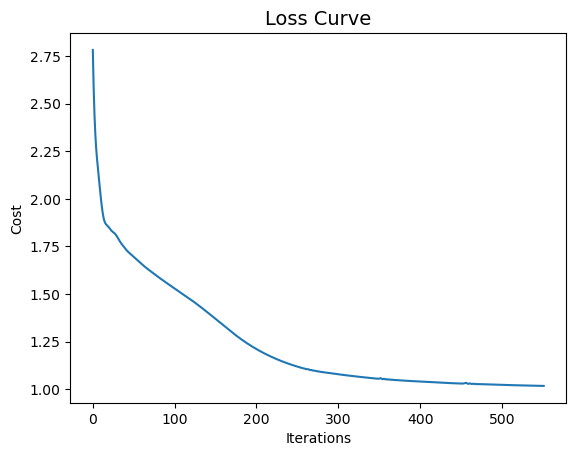

In [11]:
plt.plot(mlp_r.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

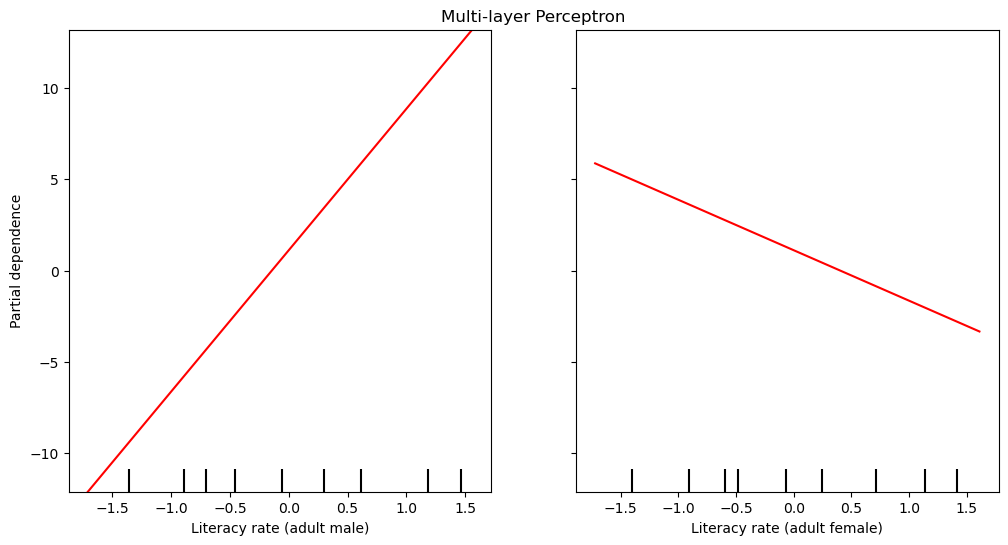

In [12]:
from sklearn.inspection import PartialDependenceDisplay

fig_lr_a, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp_r, X_train_scaled_df, ["Literacy rate (adult male)", "Literacy rate (adult female)"], ax=ax, line_kw={"color": "red"})

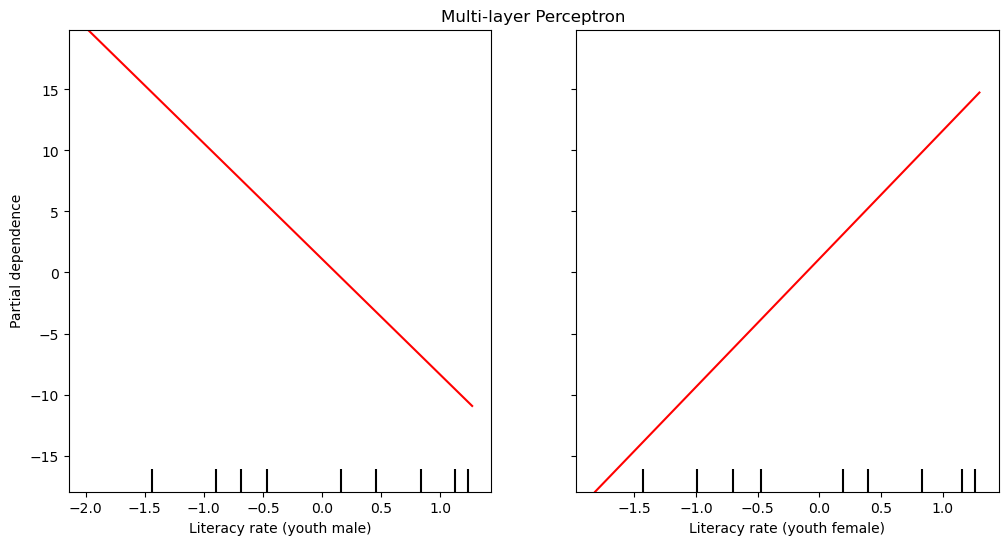

In [13]:
fig_lr_y, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp_r, X_train_scaled_df, ["Literacy rate (youth male)", "Literacy rate (youth female)"], ax=ax, line_kw={"color": "red"})

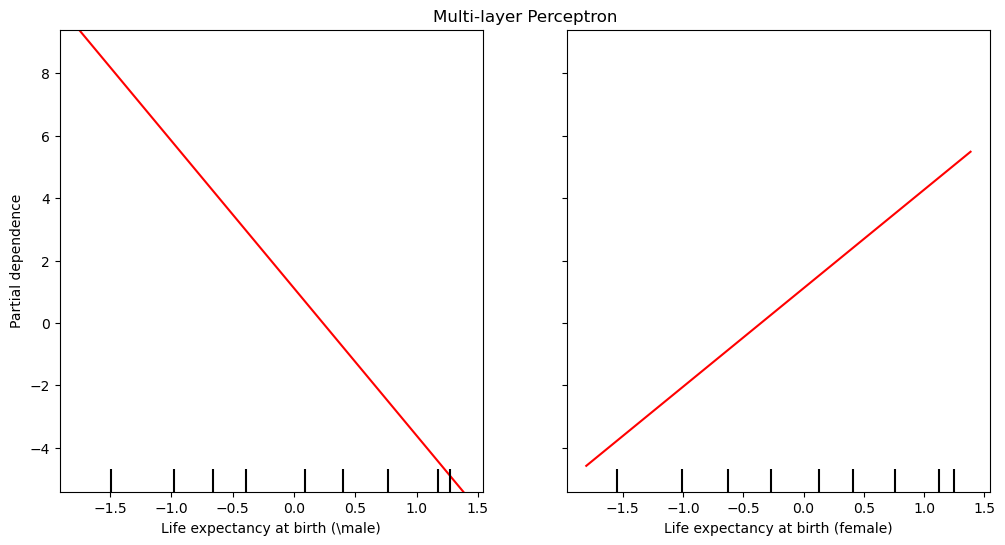

In [14]:
fig_le, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp_r, X_train_scaled_df, ["Life expectancy at birth (\male)", "Life expectancy at birth (female)"], ax=ax, line_kw={"color": "red"})

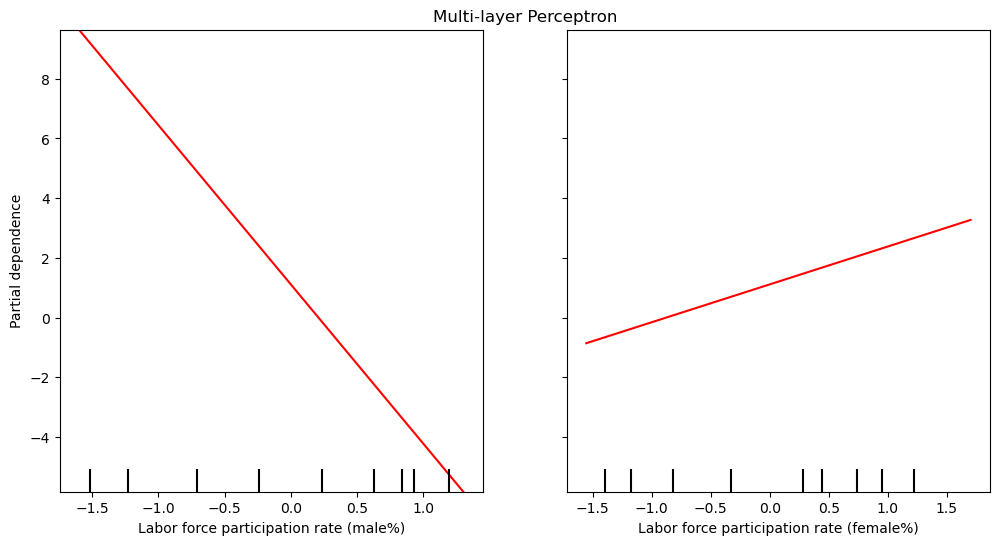

In [15]:
fig_lfpr, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = PartialDependenceDisplay.from_estimator(
    mlp_r, X_train_scaled_df, ["Labor force participation rate (male%)", "Labor force participation rate (female%)"], ax=ax, line_kw={"color": "red"})

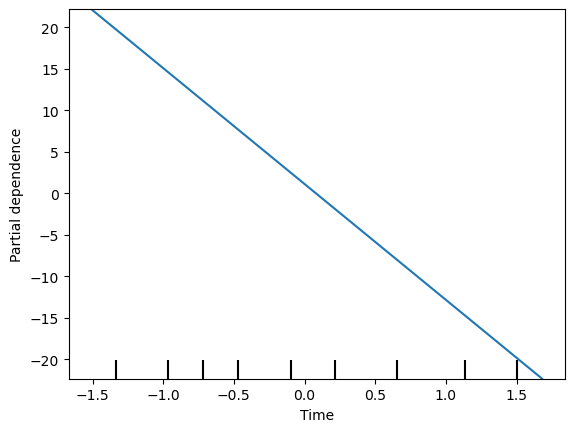

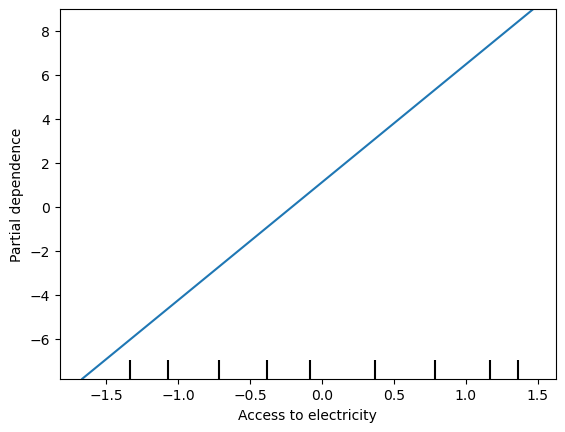

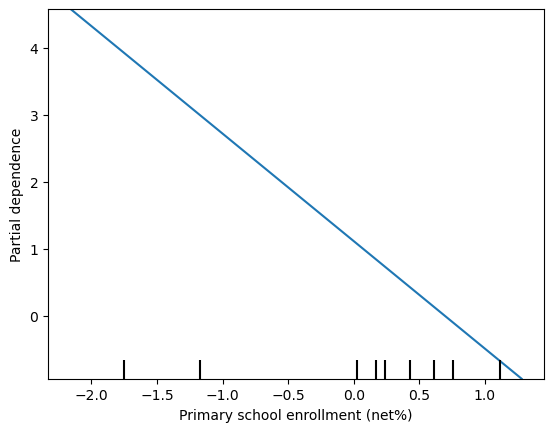

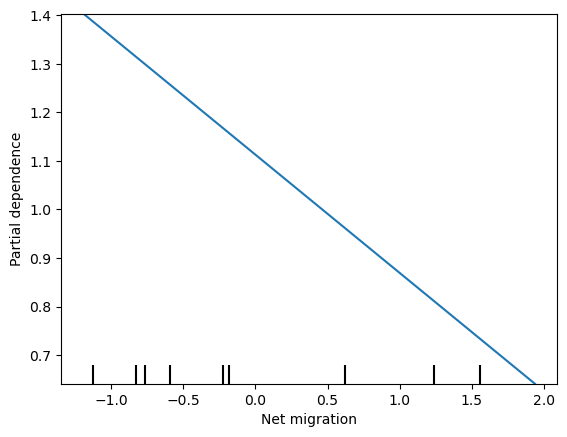

In [16]:
mlp_t_disp = PartialDependenceDisplay.from_estimator(mlp_r, X_train_scaled_df, ["Time"])
mlp_ae_disp = PartialDependenceDisplay.from_estimator(mlp_r, X_train_scaled_df, ["Access to electricity"])
mlp_se_disp = PartialDependenceDisplay.from_estimator(mlp_r, X_train_scaled_df, ["Primary school enrollment (net%)"])
mlp_nm_disp = PartialDependenceDisplay.from_estimator(mlp_r, X_train_scaled_df, ["Net migration"])

In [17]:
# coefs = mlp_r.coefs_
coefs = mlp_r.coefs_
ints = mlp_r.intercepts_

In [18]:
l1_weights_df = pd.DataFrame(coefs[0])
l2_weights_df = pd.DataFrame(coefs[1])
l3_weights_df = pd.DataFrame(coefs[2])
ol_weights_df = pd.DataFrame(coefs[3])

l1_bias_df = pd.DataFrame(ints[0])
l2_bias_df = pd.DataFrame(ints[1])
l3_bias_df = pd.DataFrame(ints[2])
ol_bias_df = pd.DataFrame(ints[3])

In [19]:
l1_weights_df.to_csv('Models/Weights/Layer_1.csv', index=False)
l2_weights_df.to_csv('Models/Weights/Layer_2.csv', index=False)
l3_weights_df.to_csv('Models/Weights/Layer_3.csv', index=False)
ol_weights_df.to_csv('Models/Weights/Output_layer.csv', index=False)

l1_bias_df.to_csv('Models/Biases/Layer_1.csv', index=False)
l2_bias_df.to_csv('Models/Biases/Layer_2.csv', index=False)
l3_bias_df.to_csv('Models/Biases/Layer_3.csv', index=False)
ol_bias_df.to_csv('Models/Biases/Output_Layer.csv', index=False)